In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

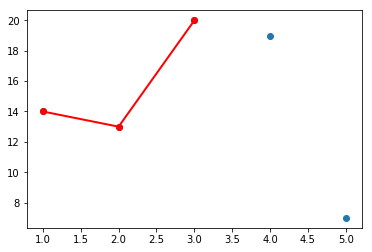

In [6]:
# 两点之间的连线
X = [1,2,3,4,5]
y = [14,13,20,19,7]
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)

l = mlines.Line2D([1, 2, 3],  # 所有连接点的横坐标
                  [14, 13, 20], # 所有连接点的纵坐标
                  color='r',
                  linewidth=2,
                  marker='o',
                  markersize=6
                 )
ax.add_line(l)

In [7]:
# 导入数据 demo
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

In [8]:
df.head()

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


In [13]:
df.shape

(5, 3)

In [10]:
# 从数据中调取需要的标签
left_label = [str(c) + ', ' + str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', ' + str(round(y)) for c, y in zip(df.continent, df['1957'])]

In [11]:
left_label

['Africa, 1253',
 'Americas, 4079',
 'Asia, 5195',
 'Europe, 5661',
 'Oceania, 10298']

In [12]:
right_label

['Africa, 1385',
 'Americas, 4616',
 'Asia, 4003',
 'Europe, 6963',
 'Oceania, 11599']

In [15]:
print(round(1252.57246582115, 1)) # 保留一位小数（四舍五入）
print(round(1252.57246582115)) #返回一个整数（四舍五入）

1252.6
1253


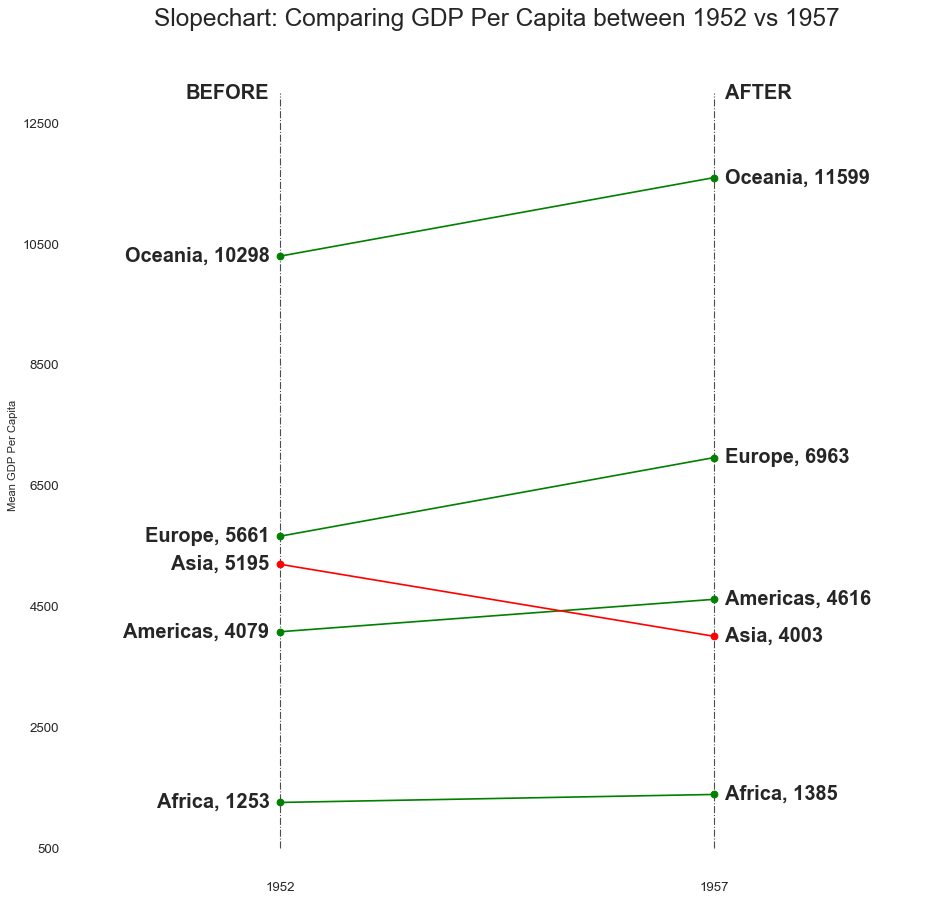

In [57]:
#设置风格
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

# 从数据中调取需要的标签
left_label = [str(c) + ', ' + str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', ' + str(round(y)) for c, y in zip(df.continent, df['1957'])]

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], 
                      [p1[1], p2[1]], 
                      color= 'red' if p1[1] > p2[1] else 'green', 
                      marker='o',
                      markersize=6,
                     )
    ax.add_line(l)
    return l

# 创建子图
fig, ax = plt.subplots(1, 1, figsize=(14, 14), dpi=80)

# 绘制两条竖线
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyle='dashdot')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyle='dashdot')

# 在两条线上打上散点
ax.scatter(x=np.repeat(1, df.shape[0]), 
           y=df['1952'],
           s=10,
           color='black',
           alpha=0.7
          )
ax.scatter(x=np.repeat(3, df.shape[0]), 
           y=df['1957'], 
           s=10, 
           color='black',
           alpha=0.7
          )

# 绘制折现
for p1, p2, c in zip(df['1952'], df['1957'], df.continent):
    newline([1, p1], [3, p2])
    # 为每个数据点的旁边添加文字
    ax.text(1-0.05, 
            p1, 
            c + ', ' + str(round(p1)),
            ha='right',
            va='center',
            fontdict={'size': 18, 'weight':700}
           )
    ax.text(3+0.05, 
            p2, 
            c + ', ' + str(round(p2)),
            ha='left',
            va='center',
            fontdict={'size': 18, 'weight':700}
           )
ax.text(1-0.05, 13000, 
        'BEFORE', 
        ha='right', 
        va='center', 
        fontdict={'size': 18, 'weight':700}
       )
ax.text(3+0.05, 13000, 
        'AFTER', 
        ha='left', 
        va='center', 
        fontdict={'size': 18, 'weight':700}
       )

#装饰图像
ax.set_title('Slopechart: Comparing GDP Per Capita between 1952 vs 1957', fontdict={'size': 22})
ax.set(xlim=(0, 4), ylim=(0, 14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1, 3])
ax.set_xticklabels(['1952', '1957'], fontsize=12)
# ax.set_yticks 没有fontsize属性，只能设置大小，不能直接设置fontsize
# ax.set_yticks(np.arange(500, 13000, 2000))
# ax.set_yticklabels(np.arange(500, 13000, 2000), fontsize=12)
# 这个和set_yticklabels是等价的
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# 将图像的横纵坐标透明化：核心Artisit：坐标轴，用spines表示
plt.gca().spines['top'].set_alpha(0)
plt.gca().spines['bottom'].set_alpha(0)
plt.gca().spines['left'].set_alpha(0)
plt.gca().spines['right'].set_alpha(0)

plt.show()

### 19/50 哑铃图

In [58]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# demo 演示数据
#猜测：这可能是不同地区的医疗费用占人均GDP的一个百分比
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")

In [60]:
df.head()

,Area,pct_2014,pct_2013
0,Houston,0.19,0.22
1,Miami,0.19,0.24
2,Dallas,0.18,0.21
3,San Antonio,0.15,0.19
4,Atlanta,0.15,0.18


In [61]:
df.shape

(26, 3)

In [62]:
names = ["地区","2014年医疗费用百分比","2013年医疗费用百分比"]
[*zip(df.columns, names)]


[('Area', '地区'), ('pct_2014', '2014年医疗费用百分比'), ('pct_2013', '2013年医疗费用百分比')]

In [65]:
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)
df

,index,Area,pct_2014,pct_2013
0,25,Boston,0.04,0.04
1,23,Pittsburgh,0.06,0.07
2,22,Baltimore,0.06,0.09
3,24,Minneapolis,0.06,0.08
4,21,San Francisco,0.08,0.11
5,20,Seattle,0.08,0.12
6,19,Philadelphia,0.08,0.10
7,18,Detroit,0.09,0.11
8,17,St. Louis,0.09,0.10
9,16,Portland,0.09,0.13


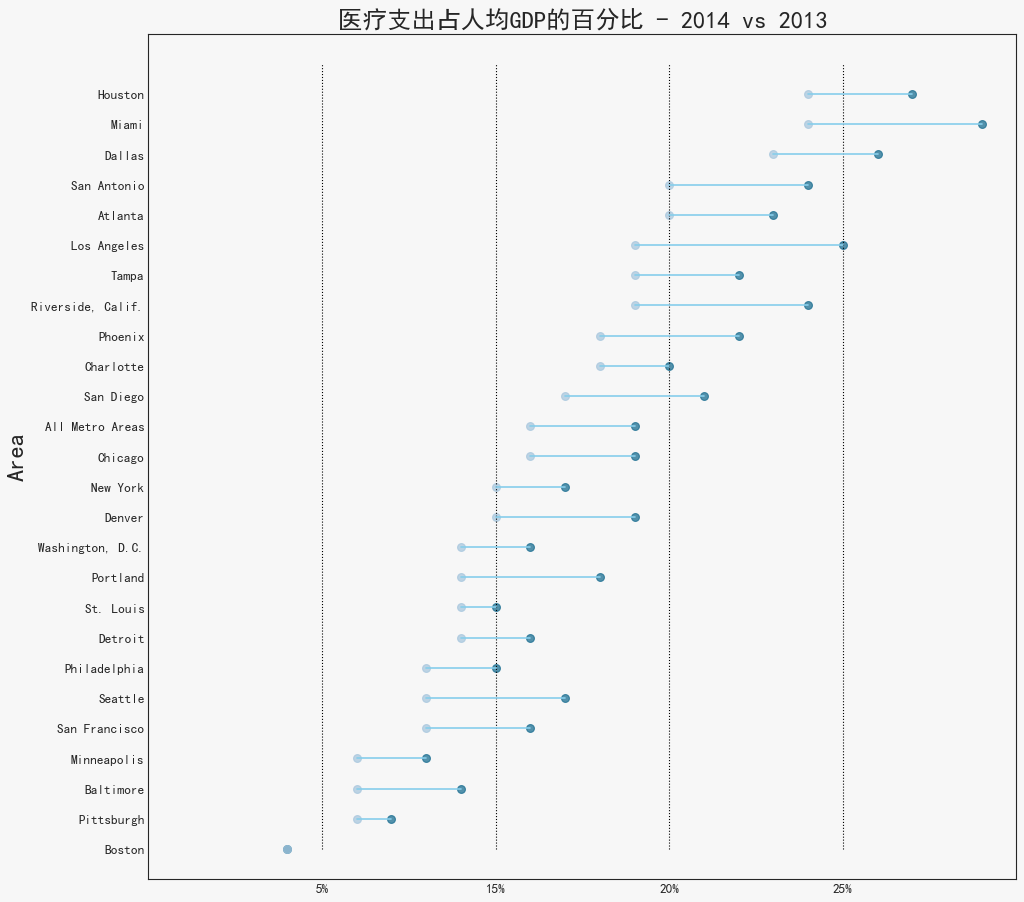

In [81]:
#定义绘制折线的函数
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# 建立画布
fig, ax = plt.subplots(1, 1, 
                       figsize=(14, 14),
                       facecolor='#f7f7f7',
                       dpi=80
                      )
ax.vlines(x=0.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=0.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=0.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=0.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# 绘制连接点
ax.scatter(df.pct_2013, df.index, s=50, color='#0e668b', alpha=0.7)
ax.scatter(df.pct_2014, df.index, s=50, color='#a3c4dc', alpha=0.7)

for i, p1, p2 in zip(df.index, df.pct_2013, df.pct_2014):
    newline([p1, i], [p2, i])

# 装饰
plt.rcParams['font.sans-serif']=['Simhei'] 
ax.set_title("医疗支出占人均GDP的百分比 - 2014 vs 2013", fontdict={'size':22}) 
ax.set(xlim=(0, 0.25), ylim=(-1, 27))
ax.set_ylabel('Area', fontsize=22)
ax.set_facecolor('#f7f7f7')

# 设置xy轴上的标尺&标题
# ax.set_xticks([0.05, 0.10, 0.15, 0.20])
# ax.set_xticklabels(['5%', '15%', '20%', '25%'])
plt.xticks([0.05, 0.10, 0.15, 0.20], ['5%', '15%', '20%', '25%'], fontsize=12)
plt.yticks(df.index, df.Area, fontsize=12)
plt.show()
